In [1]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as img
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten
from keras.layers import Dense, Dropout
from keras.callbacks import ModelCheckpoint

In [2]:
datasetsdir = 'data/dogs-vs-cats/train'

uint8


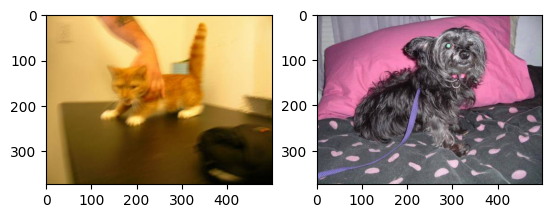

In [3]:
data = img.imread(datasetsdir+'/cats/cat.0.jpg')
print(data.dtype)
plt.subplot(1, 2, 1)
plt.imshow(img.imread(datasetsdir+'/cats/cat.0.jpg'))
plt.subplot(1, 2, 2)
plt.imshow(img.imread(datasetsdir+'/dogs/dog.0.jpg'))

In [4]:
images = []
for i in range(10):
    im = img.imread(datasetsdir+'/cats/cat.{}.jpg'.format(i))
    images.append(im)
    print('image shape', im.shape, 'maximum color level', im.max())

image shape (374, 500, 3) maximum color level 255
image shape (280, 300, 3) maximum color level 248
image shape (396, 312, 3) maximum color level 255
image shape (414, 500, 3) maximum color level 255
image shape (375, 499, 3) maximum color level 255
image shape (144, 175, 3) maximum color level 255
image shape (303, 400, 3) maximum color level 255
image shape (499, 495, 3) maximum color level 255
image shape (345, 461, 3) maximum color level 255
image shape (425, 320, 3) maximum color level 247


In [5]:
gen = ImageDataGenerator()

In [6]:
os.chdir(datasetsdir)
iterator = gen.flow_from_directory(
    os.getcwd(),
    target_size=(256, 256),
    classes=('dogs', 'cats')
)

Found 25000 images belonging to 2 classes.


In [7]:
batch = iterator.next()
len(batch)

2

In [8]:
print(type(batch[0]))
print(type(batch[1]))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [9]:
print(batch[0].shape)
print(batch[0].dtype)
print(batch[0].max())
print(batch[1].shape)
print(batch[1].dtype)

(32, 256, 256, 3)
float32
255.0
(32, 2)
float32


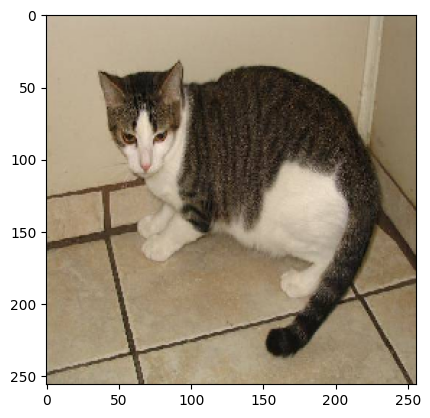

In [10]:
import numpy as np

plt.imshow(batch[0][0].astype(np.int16))

In [11]:
batch[1][0]

array([0., 1.], dtype=float32)

In [12]:
def plot_images(batch):
    imgs = batch[0]
    labels = batch[1]
    ncols, nrows = 4, 8
    fig = plt.figure(figsize=(ncols*3, nrows*3), dpi=90)
    for i ,(img, label) in enumerate(zip(imgs,labels)):
        plt.subplot(nrows, ncols, i+1)
        plt.imshow(img.astype(np.int16))
        assert(label[0]+label[1]==1.)
        categ = 'dog' if label[0]>0.5 else 'cat'
        plt.title('{} {}'.format(str(label), categ))
        plt.axis('off')

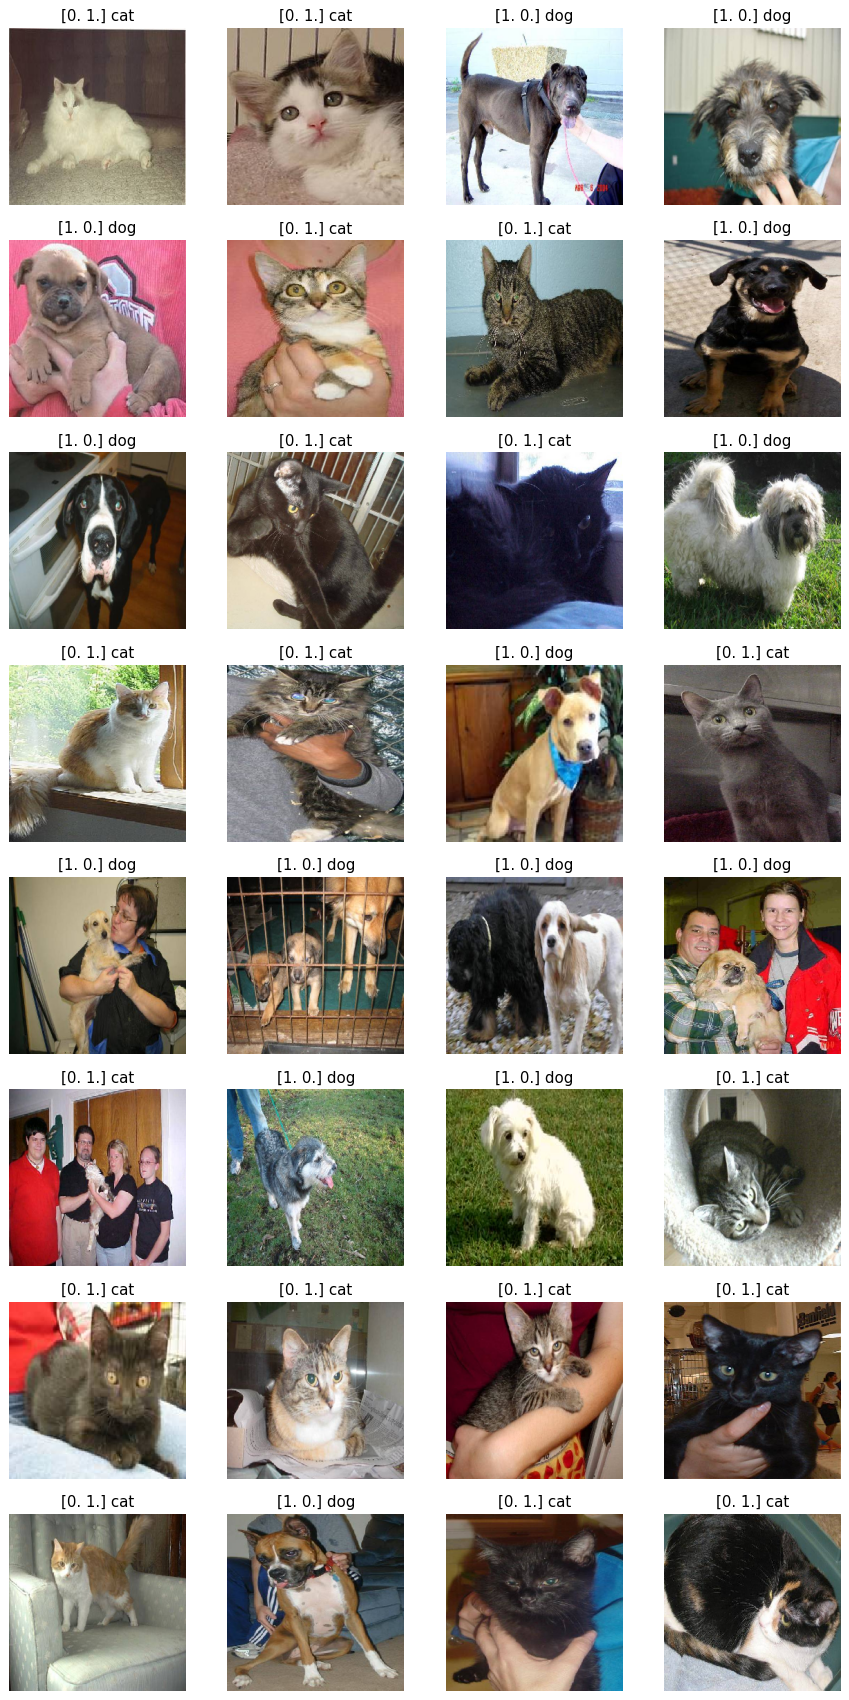

In [13]:
plot_images(iterator.next())

In [14]:
imgdatagen = ImageDataGenerator(
    rescale = 1.0/255,
    validation_split = 0.2
)

In [15]:
batch_size = 30
height, width = (256, 256)

train_dataset = imgdatagen.flow_from_directory(
    os.getcwd(),
    target_size = (height, width),
    classes = ('dogs', 'cats'),
    batch_size = batch_size,
    subset = 'training'
)

val_dataset = imgdatagen.flow_from_directory(
    os.getcwd(),
    target_size = (height, width),
    classes = ('dogs', 'cats'),
    batch_size = batch_size,
    subset = 'validation'
)

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [16]:
model = Sequential()

model.add(Conv2D(24, 5, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D(2))
model.add(Conv2D(48, 5, activation='relu'))
model.add(MaxPooling2D(2))
model.add(Conv2D(96, 5, activation='relu'))
model.add(Flatten())
model.add(Dropout(0.9))
model.add(Dense(2, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 252, 252, 24)      1824      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 126, 126, 24)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 122, 122, 48)      28848     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 61, 61, 48)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 57, 57, 96)        115296    
                                                                 
 flatten (Flatten)           (None, 311904)            0

In [17]:
model.compile(loss='binary_crossentropy',
              optimizer=keras.optimizers.Adamax(learning_rate=0.001),
              metrics=['acc'])
model_ckpt = ModelCheckpoint(filepath='model/dogs_vs_cats/CNN/model_{epoch:02d}.h5')

In [18]:
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=20,
    verbose=1,
    callbacks=[model_ckpt]
)

Epoch 1/20
667/667 [==============================] - 49s 66ms/step - loss: 0.6247 - acc: 0.6315 - val_loss: 0.5366 - val_acc: 0.7342
Epoch 2/20
667/667 [==============================] - 44s 66ms/step - loss: 0.5241 - acc: 0.7372 - val_loss: 0.5010 - val_acc: 0.7608
Epoch 3/20
667/667 [==============================] - 43s 64ms/step - loss: 0.4718 - acc: 0.7771 - val_loss: 0.5254 - val_acc: 0.7480
Epoch 4/20
667/667 [==============================] - 43s 64ms/step - loss: 0.4378 - acc: 0.7965 - val_loss: 0.4386 - val_acc: 0.8012
Epoch 5/20
667/667 [==============================] - 43s 65ms/step - loss: 0.4091 - acc: 0.8163 - val_loss: 0.4596 - val_acc: 0.7762
Epoch 6/20
667/667 [==============================] - 45s 67ms/step - loss: 0.3829 - acc: 0.8303 - val_loss: 0.3974 - val_acc: 0.8234
Epoch 7/20
667/667 [==============================] - 44s 66ms/step - loss: 0.3652 - acc: 0.8431 - val_loss: 0.3875 - val_acc: 0.8252
Epoch 8/20
667/667 [==============================] - 44s 65ms

In [19]:
def plot_history(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
        
    plt.plot(acc, label='training accuracy')
    plt.plot(val_acc, label='validation accuracy')
    plt.legend(frameon=False)
    plt.title('Training and validation accuracy')   
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    
    plt.figure()
    plt.plot(loss, label='training loss')
    plt.plot(val_loss, label='validation loss')
    plt.legend(frameon=False)
    plt.title('Training and validation loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    
    plt.show()

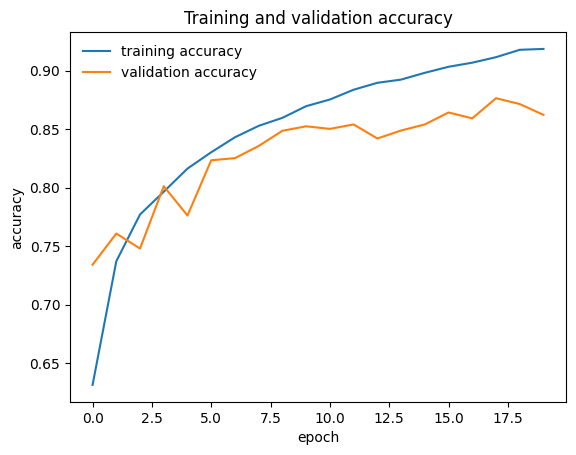

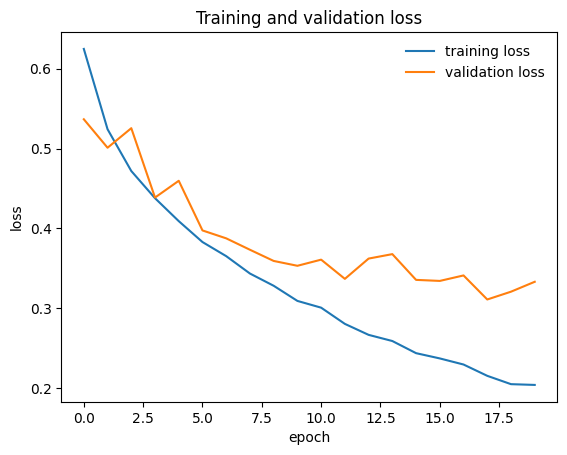

In [20]:
plot_history(history)

In [50]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

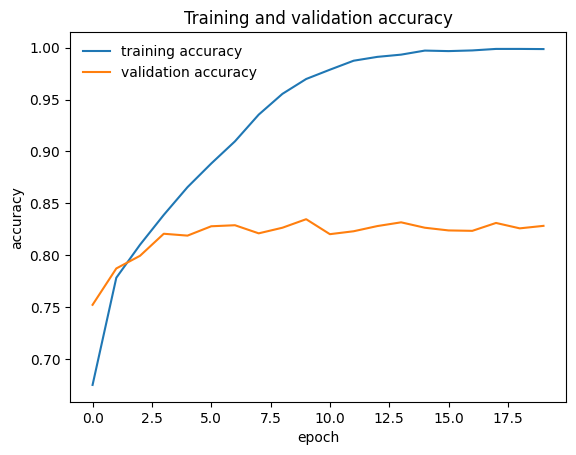

In [62]:
plt.plot(acc, label="training accuracy")
plt.plot(val_acc, label='validation accuracy')
plt.legend(frameon=False)
#plt.plot(acc)
#plt.plot(val_acc)
#plt.legend(['Train', 'Test'], loc='upper left')
plt.title('Training and validation accuracy')   
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

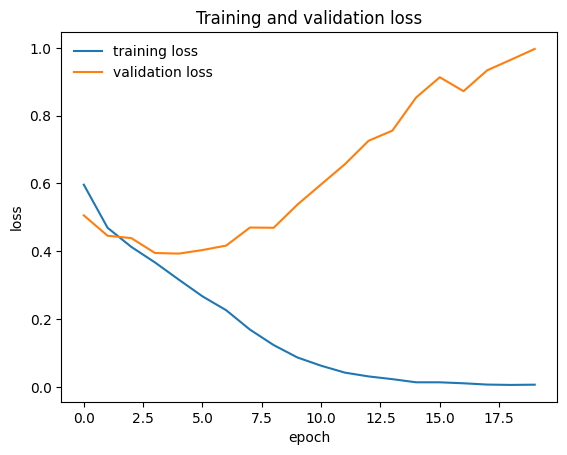

In [57]:
plt.plot(loss, label='training loss')
plt.plot(val_loss, label='validation loss')
plt.legend(frameon=False)
plt.title('Training and validation loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [21]:
model_path = 'C:/Jupyter Notebook/TensorFlow/model/dogs_vs_cats/CNN_model_1.h5'
model.save(model_path)

In [22]:
del model

In [23]:
from keras.models import load_model

In [24]:
model = load_model(model_path)

In [25]:
from keras.preprocessing import image

In [26]:
test_path = 'C:/Jupyter Notebook/TensorFlow/data/dogs-vs-cats/test/'

tf.Tensor([[4.8738443e-06 9.9999511e-01]], shape=(1, 2), dtype=float32)


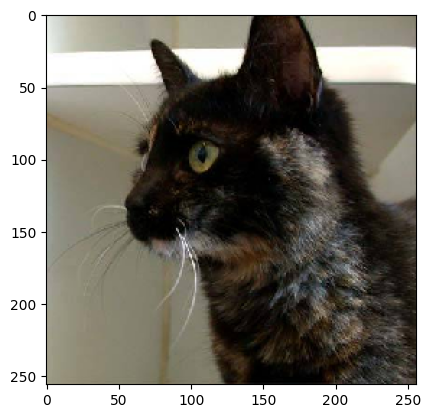

In [30]:
data = image.load_img(test_path+'5.jpg', target_size=(height, width))
x = image.img_to_array(data)
x = np.expand_dims(x, axis=0)
x /= 255
pred = model(x)
print(pred)
plt.imshow(data)
#print(x.shape)
#print(x.dtype)

In [39]:
os.chdir('C:/Jupyter Notebook/TensorFlow/data/dogs-vs-cats/train')

In [40]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_dataset = test_datagen.flow_from_directory(
    os.getcwd(),
    target_size=(256, 256),
    classes=('dogs', 'cats')
)

Found 25000 images belonging to 2 classes.


In [42]:
score = model.evaluate(test_dataset)

782/782 [==============================] - 38s 48ms/step - loss: 0.1895 - acc: 0.9271


In [44]:
loss, acc = score

In [47]:
print(f"loss:{loss:.4f}, accuracy:{acc:.4f}")

loss:0.1895, accuracy:0.9271
